In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
ford = yf.download("F", start='1924-09-01',end='2024-09-01') #1972-06-01 to 2024-08-30
ford

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-06-01,0.000000,2.173495,2.149165,2.153220,0.229151,1091238
1972-06-02,2.153220,2.173495,2.141055,2.149165,0.228719,1174468
1972-06-05,2.149165,2.169440,2.141055,2.149165,0.228719,5209582
1972-06-06,2.149165,2.157275,2.116725,2.124835,0.226130,1424158
1972-06-07,2.124835,2.137000,2.112670,2.112670,0.224835,675088
...,...,...,...,...,...,...
2024-08-26,11.320000,11.370000,11.070000,11.110000,11.110000,53070300
2024-08-27,11.120000,11.220000,10.990000,11.140000,11.140000,44841000
2024-08-28,11.100000,11.190000,10.980000,11.040000,11.040000,35442200


In [3]:
#a) column for daily returns using "Adj Close" price
ford["Daily Returns"] = (ford["Adj Close"].shift(-1) - ford["Adj Close"]) / ford["Adj Close"] 
# takes next days price - todays price / todays price
# .shift(-1) : shifts data up by one row

#b) column for daily log returns
ford["Log Daily Returns"] = np.log(ford["Adj Close"].shift(-1) / ford["Adj Close"])

ford

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Log Daily Returns
Date,,,,,,,,
1972-06-01,0.000000,2.173495,2.149165,2.153220,0.229151,1091238,-0.001883,-0.001885
1972-06-02,2.153220,2.173495,2.141055,2.149165,0.228719,1174468,0.000000,0.000000
1972-06-05,2.149165,2.169440,2.141055,2.149165,0.228719,5209582,-0.011321,-0.011385
1972-06-06,2.149165,2.157275,2.116725,2.124835,0.226130,1424158,-0.005725,-0.005742
1972-06-07,2.124835,2.137000,2.112670,2.112670,0.224835,675088,-0.007678,-0.007707
...,...,...,...,...,...,...,...,...
2024-08-26,11.320000,11.370000,11.070000,11.110000,11.110000,53070300,0.002700,0.002697
2024-08-27,11.120000,11.220000,10.990000,11.140000,11.140000,44841000,-0.008977,-0.009017
2024-08-28,11.100000,11.190000,10.980000,11.040000,11.040000,35442200,0.006341,0.006321


In [34]:
#c) Annualized mean rate of returns over full period using a specific formula
N = len(ford)
S_N = ford["Adj Close"].iloc[-1] # Last adjusted close price 
S_1 = ford["Adj Close"].iloc[0] # 1st adjust close price
annualized_mean_full = (252/(N-1))*np.log(S_N/S_1)

print(f"Annualized mean rate of return (full period): {100*annualized_mean_full:.4f}%")

Annualized mean rate of return (full period): 7.4380%


In [33]:
# OR
sum_returns = ford["Log Daily Returns"].sum()
mean_rate_full = (252/(N-1))*sum_returns

print(f"Annualized mean rate of return (full period): {100*mean_rate_full:.4f}%")

Annualized mean rate of return (full period): 7.4380%


In [32]:
#d) annualized mean rate of return over the last year (252 trading days)
S_N252 = ford["Adj Close"].iloc[-252]

annualized_mean_year = (252/252)*np.log(S_N/S_N252) 
print(f"Annualized mean rate of return (over the last year): {100*annualized_mean_year:.4f}%")

Annualized mean rate of return (over the last year): -1.1035%


In [10]:
#e) annualized volatility over full period [1972-06-01 to 2024-08-30]
annualized_vol_full = np.sqrt(252) * ford["Log Daily Returns"].std()

print(f"Annualized volatility over [1972-06-01 to 2024-08-30]: {100*annualized_vol_full:.4f}%")

Annualized volatility over [1972-06-01 to 2024-08-30]: 35.7158%


In [31]:
#f) annualized volatility over last year
annualized_vol_year = np.sqrt(252) * ford["Log Daily Returns"].iloc[-252:-1].std()

print(f"Annualized volatility over [1972-06-01 to 2024-08-30]: {100*annualized_vol_year:.4f}%")

Annualized volatility over [1972-06-01 to 2024-08-30]: 39.1307%


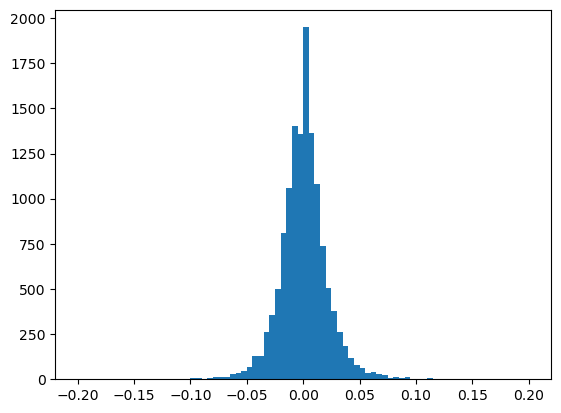

In [11]:
# 4. Histogram
import matplotlib.pyplot as plt

# a) 80 bins, width = 0.005, range = [-0.2, +0.2]
# enter log returns and bins
plt.hist(ford["Log Daily Returns"], bins = 80, range=[-0.2,0.2]) #doesnt give (-0.1975,-0.1925,..) instead does (-0.2, -0.195, )??
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Log Daily Returns of FORD")
plt.show()
# based on this graph, it look like a bell-shaped curve. 
# This indicates that the daily log returns for Ford seem follow a normal distribution.

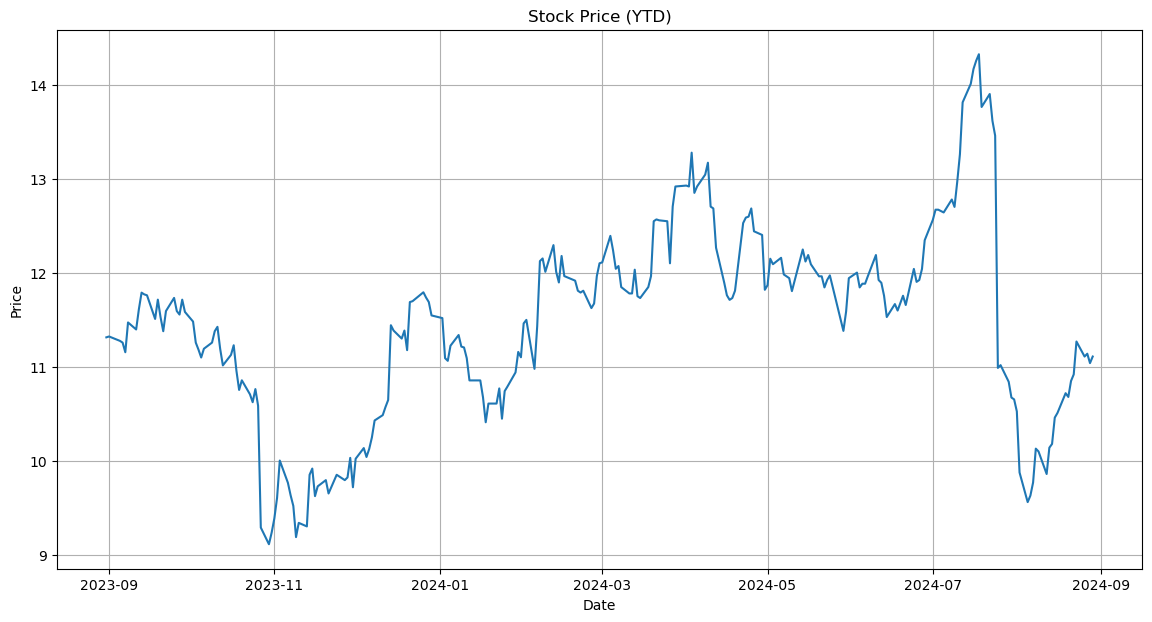

In [12]:
#5. Plot stock price over last 252 trading days
plt.figure(figsize=(14,7))
plt.plot(ford["Adj Close"].iloc[-252:-1])
plt.title("Stock Price (YTD)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()